# Probability of Error (Uncoded PAM)

In [7]:
%matplotlib inline
from pylab import *
import pamfun as pamfun

__Below is the code to calculate probability of error.__

In [4]:
# %%writefile PsEsim_x01.py
# Simulation of probability of symbol error Ps(E) for
# data transmission using uncoded PAM
from pylab import *
from numpy import *
from sys import argv
EbNodB= argv
import pamfun
# ***** Parameters *****
Fs = 1000                                             # Sampling rate
FB = 100                                              # Baud rate FB
EbNodB = float(EbNodB[-1])                                            # Specified SNR Eb/No in dB
if 7< EbNodB < 11:
    N = 10000000
elif EbNodB < 8:
    N = 100000
else:
    N = 10000000
    
# Number of symbols

ptype, pparms = 'rect',[]                             # Pulse type/parameters
an_set = [-1,+1]                                      # Set of possible an values
M = len(an_set)                                       # Number of signal levels

# ***** Compute Eb for given p(t) and signal constellation *****
Es_prime = 0
for i in an_set:
    tt, pt = pamfun.pam12(array([i]), FB, Fs, ptype, pparms)      # PAM signal
    Es_prime += (cumsum(pt*pt)/Fs)[-1]
Es = Es_prime/len(an_set)
Eb = Es/log2(M)

# ***** Generate PAM signal using random data *****

dn = array(floor(2*rand(N)),int)                      # Random binary data signal
an = 2*dn-1                                           # Polar binary sequence
tt, st = pamfun.pam12(an, FB, Fs, ptype, pparms)      # PAM signal


# ***** Generate Gaussian noise signal *****
nt = randn(len(tt))                                   # Gaussian noise


# >>>>> Compute An such that rt has desired SNR Eb/No <<<<<

N0 = Eb/(10**(EbNodB/10))
An = pow(N0*Fs/2, 0.5)
rt = st + An*nt                                       # Noisy PAM signal

# ***** PAM signal receiver *****
dly = 0
bn, bt, ixn = pamfun.pamrcvr10(tt, rt, [FB, dly], ptype, pparms)
dnhat = array(zeros(len(bn)),int)
ix = where(bn > 0)[0]
dnhat[ix] = ones(len(ix))                             # Received binary data, quantized

# ***** Compare dn, dnhat and compute Ps(E) *****

nerror = list(abs(dn - dnhat)).count(1)
PsE = nerror/len(dn)

Overwriting PsEsim_x01.py


In [11]:
PsE_array = array([])
for l in arange(0,14,1):
    z = float(l)
    %run PsEsim_x01.py $z
    PsE_array=hstack((PsE_array, array([PsE])))

__Below is the array of PsE which is corresponding to arange(0,14) SNR in dB__

In [12]:
PsE_array

array([  1.03460000e-01,   7.95700000e-02,   5.73900000e-02,
         3.91900000e-02,   2.44100000e-02,   1.41800000e-02,
         7.51000000e-03,   3.31000000e-03,   3.70200000e-04,
         7.48000000e-05,   1.05000000e-05,   1.08333333e-06,
         8.33333333e-08,   0.00000000e+00])

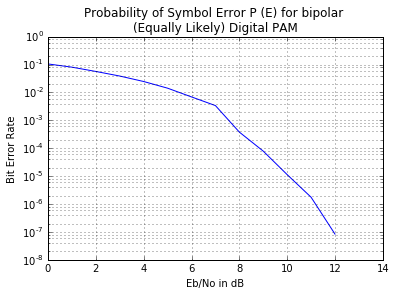

In [10]:
semilogy(arange(0,14,1),PsE_array)
grid(True,which="both")
xlabel("Eb/No in dB")
ylabel("Bit Error Rate")
title("Probability of Symbol Error P (E) for bipolar \n(Equally Likely) Digital PAM")
show()

__We find that the above simulated BER is very close to that given in the lab manual__

__(i) For 'man' pulse (SNR: 2, 4, 6, 8 dB)__

In [24]:
PsE_array = array([])
for l in arange(0,10,2):
    z = float(l)
    %run PsEsim_x01_man.py $z
    PsE_array=hstack((PsE_array, array([PsE])))

__Below is the array which contains the PsE values correpsonding to required SNR value__

In [26]:
PsE_array

array([ 0.16244  ,  0.11074  ,  0.06204  ,  0.02899  ,  0.0003762])

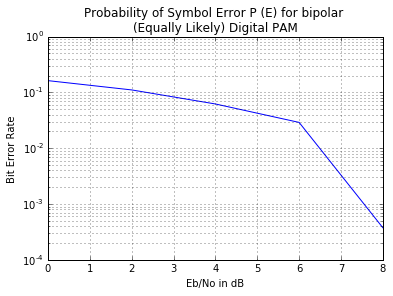

In [27]:
semilogy(arange(0,10,2),PsE_array)
grid(True,which="both")
xlabel("Eb/No in dB")
ylabel("Bit Error Rate")
title("Probability of Symbol Error P (E) for bipolar \n(Equally Likely) Digital PAM")
show()

__(ii) For 'tri' pulse (SNR: 2, 4, 6, 8 dB)__

In [21]:
PsE_array = array([])
for l in arange(0,10,2):
    z = float(l)
    %run PsEsim_x01_tri.py $z
    PsE_array=hstack((PsE_array, array([PsE])))

__Below is the array which contains the PsE values correpsonding to required SNR value__

In [22]:
PsE_array

array([ 0.09929  ,  0.06383  ,  0.03821  ,  0.02064  ,  0.0067198])

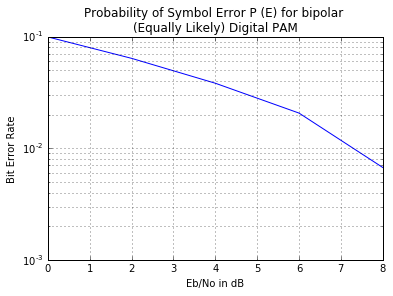

In [23]:
semilogy(arange(0,10,2),PsE_array)
grid(True,which="both")
xlabel("Eb/No in dB")
ylabel("Bit Error Rate")
title("Probability of Symbol Error P (E) for bipolar \n(Equally Likely) Digital PAM")
show()